In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import subprocess
import os

from utils import init_nodes
from spam_cluster import get_response_latenices
from pod_controller import get_loadbalancer_external_port, set_container_cpu_values

# Set the working directory to the root of the project
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
os.chdir(parent_dir)

print(f'Current working directory: {os.getcwd()}')

divide_at = 3

interval = 500
rps = 20
random_rps = False
# every = 3
initial_rps = rps

upper_rps = 60
lower_rps = 30

url = f"http://localhost:{get_loadbalancer_external_port(service_name='ingress-nginx-controller')}"
USERS = 5
recordings = 30
time_step = 5

nodes = init_nodes(debug=True, custom_label='app=localization-api')

apis = 3

Current working directory: /home/jprodanov/resource-elastisity-nancy
Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.8')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api3', 'localization-api', '10.1.245.10'), ('localization-api1', 'localization-api', '10.1.245.9')]



In [2]:
# Loading command, variable is for more realistic loading of cluster
# command = ['python', 'code/spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--all', '--variable']
command = ['python', 'code/spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--all']

Scaling is run by subproccesses

MADQN

In [3]:
set_container_cpu_values(cpus=1000)
for node in nodes:
    for container_id, (_, _, _) in list(node.get_containers().items()):
        (_, _, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
        if cpu_percentage > 20:
            time.sleep(1.5)
        else:
            break

mdqn_latenices = []
mdqn_container_recordings = []
set_container_cpu_values(cpus=100)
time.sleep(5)

Pod localization-api1 patched successfully to 1000m request and 1000m limit
Pod localization-api2 patched successfully to 1000m request and 1000m limit
Pod localization-api3 patched successfully to 1000m request and 1000m limit
Pod localization-api1 patched successfully to 100m request and 100m limit
Pod localization-api2 patched successfully to 100m request and 100m limit
Pod localization-api3 patched successfully to 100m request and 100m limit


In [4]:
spam_process = subprocess.Popen(command)
infer_process = None

for i in range(recordings):
    if i % (recordings // divide_at) == 0 and i != 0 and infer_process is None:
        print(f"Running inference at {i}")
        infer_process = subprocess.Popen(['python', 'code/infer_mdqn.py'])

    start_time = time.time()
    # latencies = get_response_latenices(USERS, url)
    # latencies = [latency for latency in latencies if latency is not None]
    latencies = [np.mean([latency if latency is not None else 2 for latency in get_response_latenices(USERS, f'{url}/api{api_id}/predict')]) for api_id in range(1, apis + 1)]

    mean_latency = np.mean(latencies)
    mdqn_latenices.append(mean_latency)

    node_recordings = []
    for node in nodes:
        for container_id, (_, _, _) in list(node.get_containers().items()):
            (cpu_limit, cpu, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
            node_recordings.append((cpu_limit, cpu, cpu_percentage))
    mdqn_container_recordings.append(node_recordings)

    elapsed_time = time.time() - start_time
    time.sleep(max(0, time_step - elapsed_time))

    # if random_rps and i % every == 0 and i != 0:
    #     rps = np.random.randint(lower_rps, upper_rps)
    #     spam_process.terminate()
    #     spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
spam_process.terminate()
infer_process.terminate()

Loading the cluster with 20 users on http://localhost:31923/api1/predict
Loading the cluster with 20 users on http://localhost:31923/api2/predict
Loading the cluster with 20 users on http://localhost:31923/api3/predict
Running inference at 10
Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.8')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api1', 'localization-api', '10.1.245.9'), ('localization-api3', 'localization-api', '10.1.245.10')]

Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.8')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api1', 'localization-api', '10.1.245.9'), ('localization-api3', 'localization-api', '10.1.245.10')]

Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 1

Thresholding

In [5]:
set_container_cpu_values(cpus=1000)
for node in nodes:
    for container_id, (_, _, _) in list(node.get_containers().items()):
        (_, _, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
        if cpu_percentage > 20:
            time.sleep(1.5)
        else:
            break

t_latencies = []
t_container_recordings = []
set_container_cpu_values(cpus=100)
time.sleep(5)

Pod localization-api1 patched successfully to 1000m request and 1000m limit
Pod localization-api2 patched successfully to 1000m request and 1000m limit
Pod localization-api3 patched successfully to 1000m request and 1000m limit
Pod localization-api1 patched successfully to 100m request and 100m limit
Pod localization-api2 patched successfully to 100m request and 100m limit
Pod localization-api3 patched successfully to 100m request and 100m limit


In [6]:
if random_rps:
    rps = initial_rps

spam_process = subprocess.Popen(command)
infer_process = None

for i in range(recordings):
    if i % (recordings // divide_at) == 0 and i != 0 and infer_process is None:
        print(f"Running inference at {i}")
        infer_process = subprocess.Popen(['python', 'code/threshold_elasticity.py'])

    start_time = time.time()
    # latencies = get_response_latenices(USERS, url)
    # latencies = [latency for latency in latencies if latency is not None]
    latencies = [np.mean([latency if latency is not None else 2 for latency in get_response_latenices(USERS, f'{url}/api{api_id}/predict')]) for api_id in range(1, apis + 1)]
    
    mean_latency = np.mean(latencies)
    t_latencies.append(mean_latency)

    node_recordings = []
    for node in nodes:
        for container_id, (_, _, _) in list(node.get_containers().items()):
            (cpu_limit, cpu, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
            node_recordings.append((cpu_limit, cpu, cpu_percentage))
    t_container_recordings.append(node_recordings)
    
    elapsed_time = time.time() - start_time
    time.sleep(max(0, time_step - elapsed_time))

    # if random_rps and i % every == 0 and i != 0:
    #     rps = np.random.randint(lower_rps, upper_rps)
    #     spam_process.terminate()
    #     spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
spam_process.terminate()
infer_process.terminate()


Loading the cluster with 20 users on http://localhost:31923/api1/predict
Loading the cluster with 20 users on http://localhost:31923/api2/predict
Loading the cluster with 20 users on http://localhost:31923/api3/predict
Running inference at 10
DEBUG: True, custom_app_label: app=localization-api, scale_cpu: 25, max_cpu: 1000, CPU limits: upper: 60, lower: 30, action_interval: 1
Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.8')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api1', 'localization-api', '10.1.245.9'), ('localization-api3', 'localization-api', '10.1.245.10')]

Pod localization-api2 patched successfully to 50m request and 50m limit
Pod localization-api1 patched successfully to 50m request and 50m limit
Pod localization-api3 patched successfully to 50m request and 50m limit
Pod localization-api2 patched successfully to 125m req

MADDPG

In [7]:
# if random_rps:
#     rps = initial_rps

# # spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
# command = ['python', 'code/spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--all'] # without variable because we dont want variability, we are evaluating
# spam_process = subprocess.Popen(command)
# ddpg_latenices = []
# ddpg_container_recordings = []
# for i in range(recordings):
#     start_time = time.time()
#     # latencies = get_response_latenices(USERS, url)
#     # latencies = [latency for latency in latencies if latency is not None]
#     latencies = [np.mean([latency if latency is not None else 2 for latency in get_response_latenices(USERS, f'{url}/api{api_id}/predict')]) for api_id in range(1, apis + 1)]
    
#     mean_latency = np.mean(latencies)
#     ddpg_latenices.append(mean_latency)

#     node_recordings = []
#     for node in nodes:
#         for container_id, (_, _, _) in list(node.get_containers().items()):
#             (cpu_limit, cpu, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
#             node_recordings.append((cpu_limit, cpu, cpu_percentage))
#     ddpg_container_recordings.append(node_recordings)

#     elapsed_time = time.time() - start_time
#     time.sleep(max(0, time_step - elapsed_time))

#     # if random_rps and i % every == 0 and i != 0:
#     #     rps = np.random.randint(lower_rps, upper_rps)
#     #     spam_process.terminate()
#     #     spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
# spam_process.terminate()

MA instant IPPO

In [8]:
set_container_cpu_values(cpus=1000)
for node in nodes:
    for container_id, (_, _, _) in list(node.get_containers().items()):
        (_, _, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
        if cpu_percentage > 20:
            time.sleep(1.5)
        else:
            break

instant_ppo_latencies = []
instant_ppo_container_recordings = []
set_container_cpu_values(cpus=100)
time.sleep(5)

Pod localization-api1 patched successfully to 1000m request and 1000m limit
Pod localization-api2 patched successfully to 1000m request and 1000m limit
Pod localization-api3 patched successfully to 1000m request and 1000m limit
Pod localization-api1 patched successfully to 100m request and 100m limit
Pod localization-api2 patched successfully to 100m request and 100m limit
Pod localization-api3 patched successfully to 100m request and 100m limit


In [9]:
if random_rps:
    rps = initial_rps

spam_process = subprocess.Popen(command)
infer_process = None

for i in range(recordings):
    if i % (recordings // divide_at) == 0 and i != 0 and infer_process is None:
        print(f"Running inference at {i}")
        infer_process = subprocess.Popen(['python', 'code/infer_ppo.py', '--instant', '--instant_hack', '--load_model', 'code/model_metric_data/ppo/66ep_rf_2_30rps8kepochs5alpha50scale_a0priority_newloading_instantscale_NOreseting_vari_res_pretrained'])

    start_time = time.time()
    # latencies = get_response_latenices(USERS, url)
    # latencies = [latency for latency in latencies if latency is not None]
    latencies = [np.mean([latency if latency is not None else 2 for latency in get_response_latenices(USERS, f'{url}/api{api_id}/predict')]) for api_id in range(1, apis + 1)]
    
    mean_latency = np.mean(latencies)
    instant_ppo_latencies.append(mean_latency)

    node_recordings = []
    for node in nodes:
        for container_id, (_, _, _) in list(node.get_containers().items()):
            (cpu_limit, cpu, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
            node_recordings.append((cpu_limit, cpu, cpu_percentage))
    instant_ppo_container_recordings.append(node_recordings)

    elapsed_time = time.time() - start_time
    time.sleep(max(0, time_step - elapsed_time))

    # if random_rps and i % every == 0 and i != 0:
    #     rps = np.random.randint(lower_rps, upper_rps)
    #     spam_process.terminate()
    #     spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
spam_process.terminate()
infer_process.terminate()

Loading the cluster with 20 users on http://localhost:31923/api1/predict
Loading the cluster with 20 users on http://localhost:31923/api2/predict
Loading the cluster with 20 users on http://localhost:31923/api3/predict
Running inference at 10
Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.8')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api1', 'localization-api', '10.1.245.9'), ('localization-api3', 'localization-api', '10.1.245.10')]

Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.8')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api1', 'localization-api', '10.1.245.9'), ('localization-api3', 'localization-api', '10.1.245.10')]

Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 1

MA granullar IPPO

In [10]:
set_container_cpu_values(cpus=1000)
for node in nodes:
    for container_id, (_, _, _) in list(node.get_containers().items()):
        (_, _, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
        if cpu_percentage > 20:
            time.sleep(1.5)
        else:
            break

granular_ppo_latencies = []
granular_ppo_container_recordings = []
set_container_cpu_values(cpus=100)
time.sleep(5)

Pod localization-api1 patched successfully to 1000m request and 1000m limit
Pod localization-api2 patched successfully to 1000m request and 1000m limit
Pod localization-api3 patched successfully to 1000m request and 1000m limit
Pod localization-api1 patched successfully to 100m request and 100m limit
Pod localization-api2 patched successfully to 100m request and 100m limit
Pod localization-api3 patched successfully to 100m request and 100m limit


In [11]:
if random_rps:
    rps = initial_rps

spam_process = subprocess.Popen(command)
infer_process = None

for i in range(recordings):
    if i % (recordings // divide_at) == 0 and i != 0 and infer_process is None:
        print(f"Running inference at {i}")
        infer_process = subprocess.Popen(['python', 'code/infer_ppo.py', '--load_model', 'code/model_metric_data/ppo/210ep_rf_2_20rps10kepochs5alpha10epupdate50scale_a_1000resources'])
        time.sleep(10) # HACK PLS :(
    
    start_time = time.time()
    # latencies = get_response_latenices(USERS, url)
    # latencies = [latency for latency in latencies if latency is not None]
    latencies = [np.mean([latency if latency is not None else 2 for latency in get_response_latenices(USERS, f'{url}/api{api_id}/predict')]) for api_id in range(1, apis + 1)]
    
    mean_latency = np.mean(latencies)
    granular_ppo_latencies.append(mean_latency)

    node_recordings = []
    for node in nodes:
        for container_id, (_, _, _) in list(node.get_containers().items()):
            (cpu_limit, cpu, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
            node_recordings.append((cpu_limit, cpu, cpu_percentage))
    granular_ppo_container_recordings.append(node_recordings)

    elapsed_time = time.time() - start_time
    time.sleep(max(0, time_step - elapsed_time))

    # if random_rps and i % every == 0 and i != 0:
    #     rps = np.random.randint(lower_rps, upper_rps)
    #     spam_process.terminate()
    #     spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
spam_process.terminate()
infer_process.terminate()

Loading the cluster with 20 users on http://localhost:31923/api1/predict
Loading the cluster with 20 users on http://localhost:31923/api2/predict
Loading the cluster with 20 users on http://localhost:31923/api3/predict
Running inference at 10
Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.8')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api1', 'localization-api', '10.1.245.9'), ('localization-api3', 'localization-api', '10.1.245.10')]

Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.8')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api1', 'localization-api', '10.1.245.9'), ('localization-api3', 'localization-api', '10.1.245.10')]

Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 1

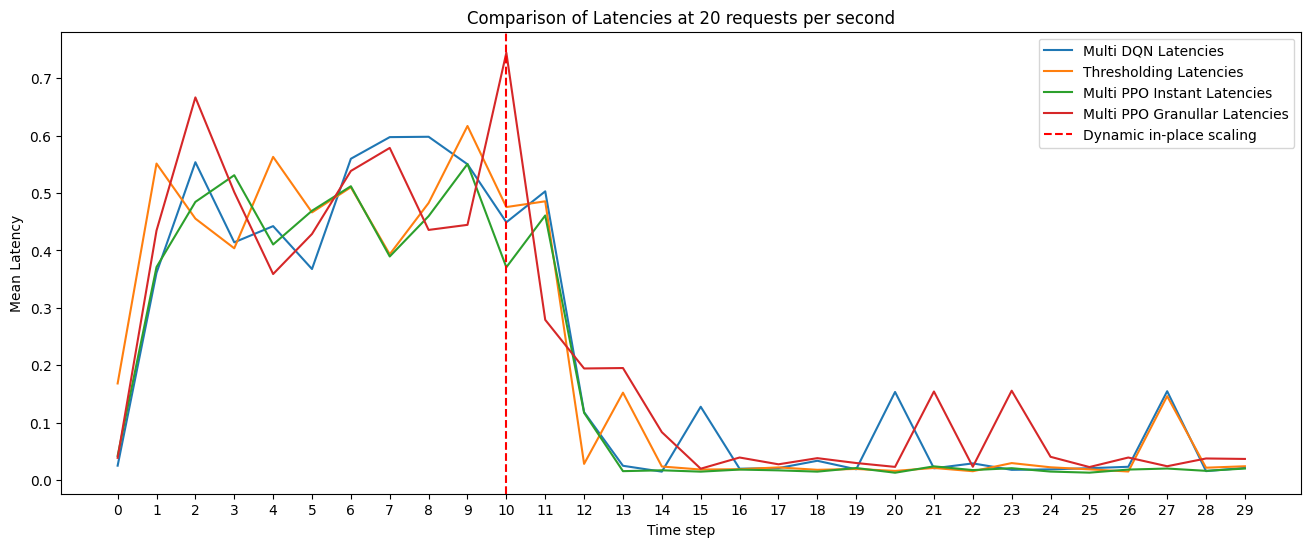

In [12]:
plt.figure(figsize=(16, 6))
plt.plot(mdqn_latenices, label='Multi DQN Latencies')
# plt.plot(ddpg_latenices, label='Multi DDPG Latencies')
plt.plot(t_latencies, label='Thresholding Latencies')
plt.plot(instant_ppo_latencies, label='Multi PPO Instant Latencies')
plt.plot(granular_ppo_latencies, label='Multi PPO Granullar Latencies')

middle_x = len(t_latencies) // divide_at
plt.axvline(x=middle_x, color='r', linestyle='--', label='Dynamic in-place scaling')

plt.xlabel('Time step')
plt.ylabel('Mean Latency')
plt.title(f'Comparison of Latencies at {initial_rps} requests per second')
plt.legend()

plt.xticks(range(len(t_latencies)))

plt.show()

In [13]:
print(f"Thresholding: {np.mean(t_latencies)}\nMDQN: {np.mean(mdqn_latenices)}\nInstant PPO: {np.mean(instant_ppo_latencies)}\nGranullar PPO: {np.mean(granular_ppo_latencies)}")

Thresholding: 0.20682967333333332
MDQN: 0.20923852888888886
Instant PPO: 0.1822251933333333
Granullar PPO: 0.22122508


In [14]:
print(f"Thresholding: {np.mean(t_latencies[len(mdqn_container_recordings) // divide_at:])}\nMDQN: {np.mean(mdqn_latenices[len(mdqn_container_recordings) // divide_at:])}\nInstant PPO: {np.mean(instant_ppo_latencies[len(mdqn_container_recordings) // divide_at:])}\nGranullar PPO: {np.mean(granular_ppo_latencies[len(mdqn_container_recordings) // divide_at:])}")

Thresholding: 0.07970802666666667
MDQN: 0.09040821333333333
Instant PPO: 0.06233717
Granullar PPO: 0.1105223966666667


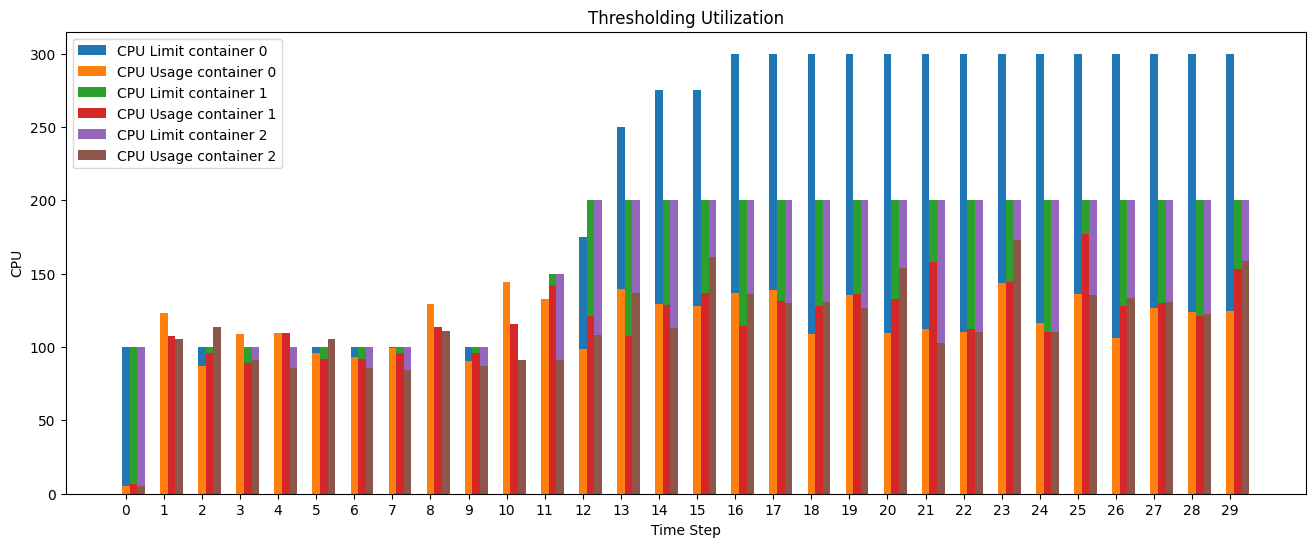

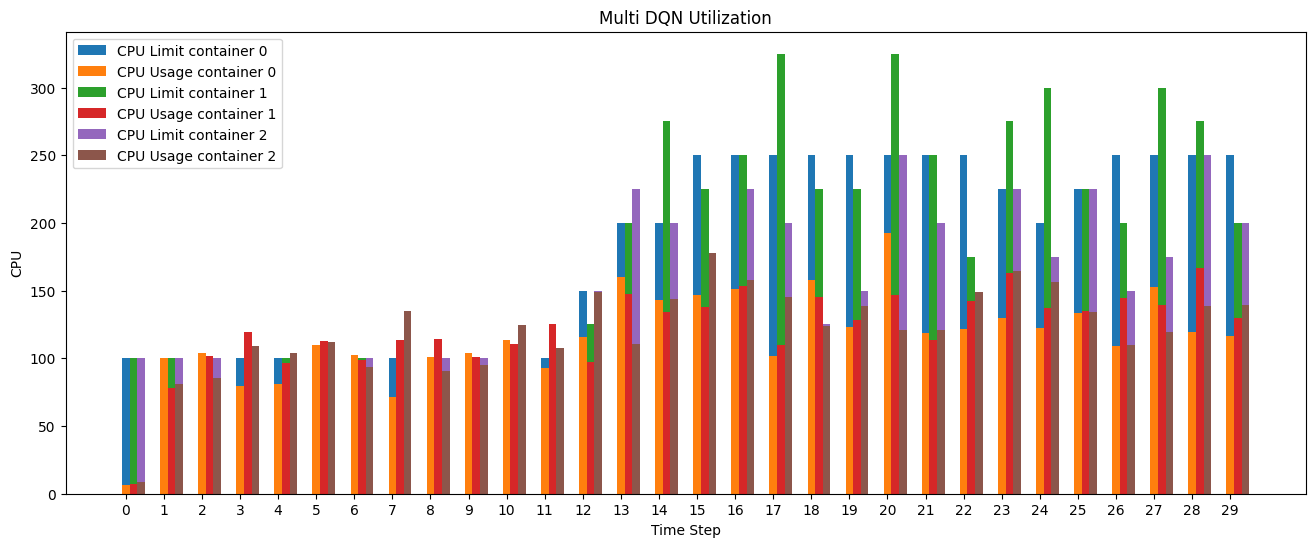

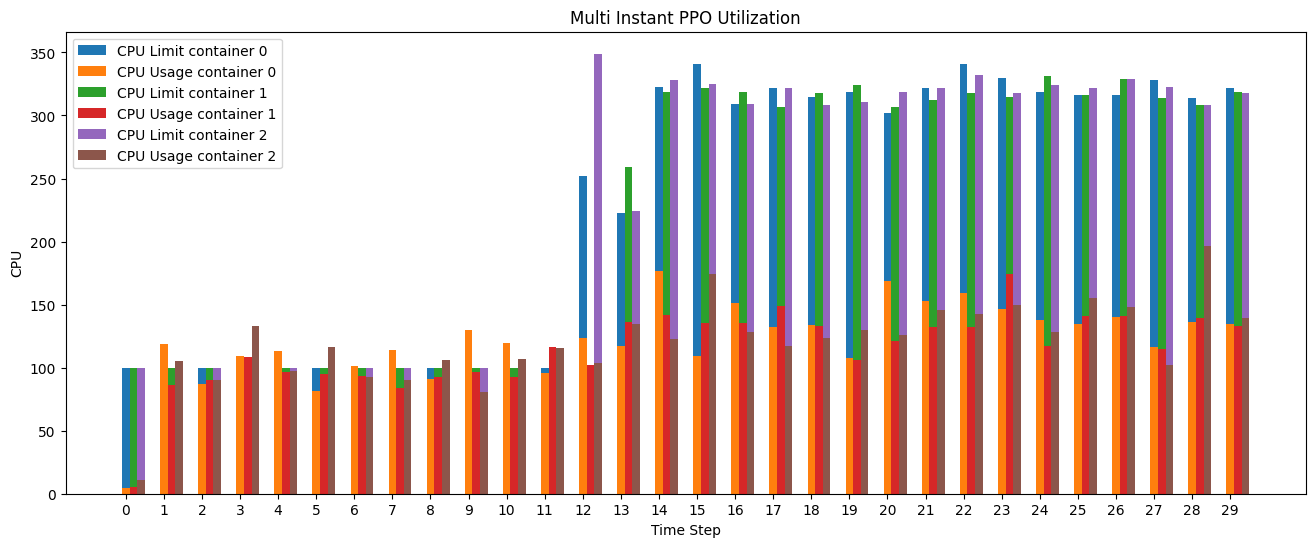

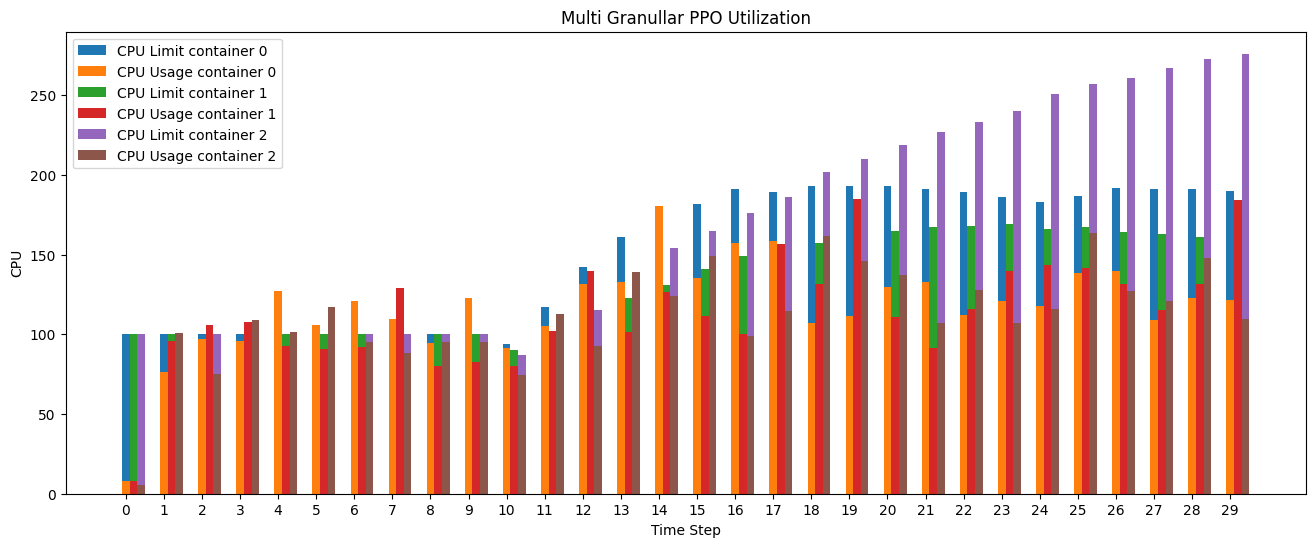

In [15]:
time_axis = range(len(t_container_recordings))

plt.figure(figsize=(16, 6))
for i, container_recordings in enumerate(zip(*t_container_recordings)):
    cpu_limits, cpu, _ = zip(*container_recordings)
    plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'CPU Limit container {i}')
    plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'CPU Usage container {i}')
plt.xlabel('Time Step')
plt.ylabel('CPU')
plt.title('Thresholding Utilization')
plt.xticks(time_axis)
plt.legend()
plt.show()

plt.figure(figsize=(16, 6))
for i, container_recordings in enumerate(zip(*mdqn_container_recordings)):
    cpu_limits, cpu, _ = zip(*container_recordings)
    plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'CPU Limit container {i}')
    plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'CPU Usage container {i}')
plt.xlabel('Time Step')
plt.ylabel('CPU')
plt.title('Multi DQN Utilization')
plt.xticks(time_axis)
plt.legend()
plt.show()

# plt.figure(figsize=(16, 6))
# for i, container_recordings in enumerate(zip(*ddpg_container_recordings)):
#     cpu_limits, cpu, _ = zip(*container_recordings)
#     plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'CPU Limit container {i}')
#     plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'CPU Usage container {i}')
# plt.xlabel('Time Step')
# plt.ylabel('CPU')
# plt.title('Multi DDPG Utilization')
# plt.legend()
# plt.show()

plt.figure(figsize=(16, 6))
for i, container_recordings in enumerate(zip(*instant_ppo_container_recordings)):
    cpu_limits, cpu, _ = zip(*container_recordings)
    plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'CPU Limit container {i}')
    plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'CPU Usage container {i}')
plt.xlabel('Time Step')
plt.ylabel('CPU')
plt.title('Multi Instant PPO Utilization')
plt.xticks(time_axis)
plt.legend()
plt.show()

plt.figure(figsize=(16, 6))
for i, container_recordings in enumerate(zip(*granular_ppo_container_recordings)):
    cpu_limits, cpu, _ = zip(*container_recordings)
    plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'CPU Limit container {i}')
    plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'CPU Usage container {i}')
plt.xlabel('Time Step')
plt.ylabel('CPU')
plt.title('Multi Granullar PPO Utilization')
plt.xticks(time_axis)
plt.legend()
plt.show()